In [34]:
from pathlib import Path
import pandas as pd

In [38]:
data = Path('Bitcoin_10_17_2023-10_16_2024_historical_data_coinmarketcap.csv')
Bit_df = pd.read_csv(data, delimiter= ';')
Bit_df['timestamp'] = pd.to_datetime(Bit_df['timestamp'])
Bit_df_clean = Bit_df[['close', 'volume', 'marketCap', 'timestamp']]
Bit_df_sorted = Bit_df_clean.sort_values(by='timestamp', ascending=True)
Bit_df_sorted.head()

,close,volume,marketCap,timestamp
363,28328.341152,1.272413e+10,5.529012e+11,2023-10-18 23:59:59.999000+00:00
362,28719.806133,1.444806e+10,5.605684e+11,2023-10-19 23:59:59.999000+00:00
361,29682.949274,2.153613e+10,5.793921e+11,2023-10-20 23:59:59.999000+00:00
360,29918.411668,1.154115e+10,5.840152e+11,2023-10-21 23:59:59.999000+00:00
359,29993.896524,1.044652e+10,5.855174e+11,2023-10-22 23:59:59.999000+00:00


In [36]:
Bit_df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   close      364 non-null    float64            
 1   volume     364 non-null    float64            
 2   marketCap  364 non-null    float64            
 3   timestamp  364 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 11.5 KB


In [39]:
data = Path('Ethereum_10_17_2023-10_16_2024_historical_data_coinmarketcap.csv')
Eth_df = pd.read_csv(data, delimiter= ';')
Eth_df['timestamp'] = pd.to_datetime(Eth_df['timestamp'])
Eth_df_clean = Eth_df[['close', 'volume', 'marketCap', 'timestamp']]
Eth_df_sorted = Eth_df_clean.sort_values(by='timestamp', ascending=True)
Eth_df_sorted.head()

,close,volume,marketCap,timestamp
363,1563.749884,4.354139e+09,1.880601e+11,2023-10-18 23:59:59.999000+00:00
362,1567.457073,5.035111e+09,1.885080e+11,2023-10-19 23:59:59.999000+00:00
361,1604.666867,6.747486e+09,1.929852e+11,2023-10-20 23:59:59.999000+00:00
360,1629.304477,4.212180e+09,1.959497e+11,2023-10-21 23:59:59.999000+00:00
359,1663.429945,5.248407e+09,2.000533e+11,2023-10-22 23:59:59.999000+00:00


In [40]:
# Calculate daily percentage returns
Eth_df_sorted['eth_return'] = Eth_df_clean['marketCap'].pct_change() 
Bit_df_sorted['bit_return'] = Bit_df_clean['marketCap'].pct_change() 



In [41]:
Eth_df_sorted.head()

,close,volume,marketCap,timestamp,eth_return
363,1563.749884,4.354139e+09,1.880601e+11,2023-10-18 23:59:59.999000+00:00,-0.002376
362,1567.457073,5.035111e+09,1.885080e+11,2023-10-19 23:59:59.999000+00:00,-0.023200
361,1604.666867,6.747486e+09,1.929852e+11,2023-10-20 23:59:59.999000+00:00,-0.015129
360,1629.304477,4.212180e+09,1.959497e+11,2023-10-21 23:59:59.999000+00:00,-0.020513
359,1663.429945,5.248407e+09,2.000533e+11,2023-10-22 23:59:59.999000+00:00,-0.051883


In [43]:
correlation = Bit_df_sorted['bit_return'].corr(Eth_df_sorted['eth_return'])

correlation

0.8100694610511692

In [44]:
merged_df = pd.merge(Bit_df_sorted, Eth_df_sorted, on="timestamp", how='inner')
merged_df.head()

,close_x,volume_x,marketCap_x,timestamp,bit_return,close_y,volume_y,marketCap_y,eth_return
0,28328.341152,1.272413e+10,5.529012e+11,2023-10-18 23:59:59.999000+00:00,-0.013678,1563.749884,4.354139e+09,1.880601e+11,-0.002376
1,28719.806133,1.444806e+10,5.605684e+11,2023-10-19 23:59:59.999000+00:00,-0.032489,1567.457073,5.035111e+09,1.885080e+11,-0.023200
2,29682.949274,2.153613e+10,5.793921e+11,2023-10-20 23:59:59.999000+00:00,-0.007916,1604.666867,6.747486e+09,1.929852e+11,-0.015129
3,29918.411668,1.154115e+10,5.840152e+11,2023-10-21 23:59:59.999000+00:00,-0.002566,1629.304477,4.212180e+09,1.959497e+11,-0.020513
4,29993.896524,1.044652e+10,5.855174e+11,2023-10-22 23:59:59.999000+00:00,-0.093509,1663.429945,5.248407e+09,2.000533e+11,-0.051883


In [49]:
merged_df['correlation'] = merged_df['bit_return'].rolling(window= 30).corr(merged_df['eth_return'])

merged_df.head()
#merged_df['correlation'].min()

,close_x,volume_x,marketCap_x,timestamp,bit_return,close_y,volume_y,marketCap_y,eth_return,correlation
0,28328.341152,1.272413e+10,5.529012e+11,2023-10-18 23:59:59.999000+00:00,-0.013678,1563.749884,4.354139e+09,1.880601e+11,-0.002376,NaN
1,28719.806133,1.444806e+10,5.605684e+11,2023-10-19 23:59:59.999000+00:00,-0.032489,1567.457073,5.035111e+09,1.885080e+11,-0.023200,NaN
2,29682.949274,2.153613e+10,5.793921e+11,2023-10-20 23:59:59.999000+00:00,-0.007916,1604.666867,6.747486e+09,1.929852e+11,-0.015129,NaN
3,29918.411668,1.154115e+10,5.840152e+11,2023-10-21 23:59:59.999000+00:00,-0.002566,1629.304477,4.212180e+09,1.959497e+11,-0.020513,NaN
4,29993.896524,1.044652e+10,5.855174e+11,2023-10-22 23:59:59.999000+00:00,-0.093509,1663.429945,5.248407e+09,2.000533e+11,-0.051883,NaN


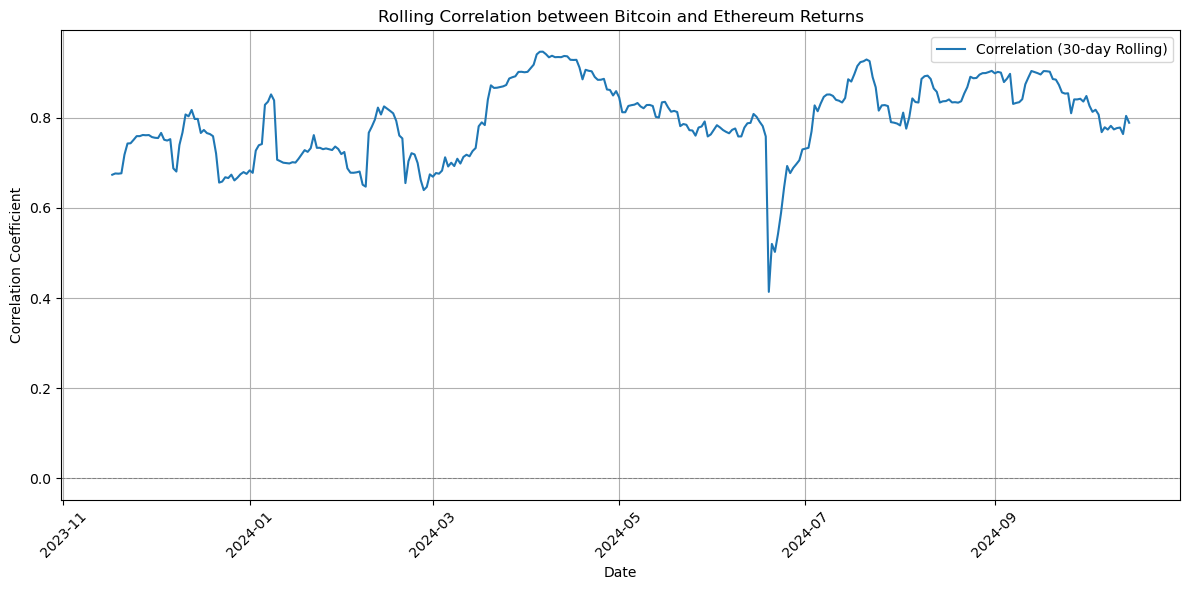

In [51]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(merged_df['timestamp'], merged_df['correlation'], label='Correlation (30-day Rolling)')
plt.title('Rolling Correlation between Bitcoin and Ethereum Returns')
plt.xlabel('Date')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()